In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [28]:
train_set = pd.read_csv(r'C:\Users\meirk\Desktop\fashionMnist\fashion-mnist_train.csv\fashion-mnist_train.csv')

In [29]:
train_copy = train_set.copy()
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
labels_list = {0: 't-shirt', 1: 'pants', 2: 'swetear', 3: 'dress', 4: 'coat',
              5: 'sandal', 6: 'shirt', 7: 'shoe', 8: 'bag', 9: 'boot'}

labels_df = pd.DataFrame([[0,'t-shirt'], [1,'pants'], [2,'swetear'], [3,'dress'], [4,'coat'],
              [5,'sandal'], [6,'shirt'], [7,'shoe'],[8,'bag'],[9,'boot']], columns=["id", "category"])
labels_df

,id,category
0,0,t-shirt
1,1,pants
2,2,swetear
3,3,dress
4,4,coat
5,5,sandal
6,6,shirt
7,7,shoe
8,8,bag
9,9,boot


In [32]:
train_copy = train_copy.merge(right= labels_df,how='inner',
                                      left_on='label', right_on='id').drop(axis =1,columns='id')
train_copy

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,category
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
1,2,0,0,0,0,1,1,0,0,0,...,0,118,190,162,82,0,0,0,0,swetear
2,2,0,0,0,0,0,0,0,0,16,...,0,1,1,1,1,0,0,0,0,swetear
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,swetear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants
59997,1,0,0,0,0,0,0,0,0,24,...,25,0,0,0,0,0,0,0,0,pants
59998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,pants


In [33]:
target_set = train_set['label']
train_without_label = train_set.drop(['label'], axis = 1)
train_without_label2 = train_set.drop(['label'], axis = 1)

### Data vizualizaton

In [34]:
def get_pixel_cols():
    return ['pixel' + str(i) for i in range(1, 785)]

def index_to_pixels(df, index):
    return df.iloc[index][get_pixel_cols()]

def plot_image_pd(pixels_series):
    pix_mat = pixels_series.values.reshape(28, 28)
    imgplot = plt.imshow(pix_mat, cmap='gray')

In [35]:
labels = train_set.label.value_counts().index.values.tolist()
labels = sorted(labels)

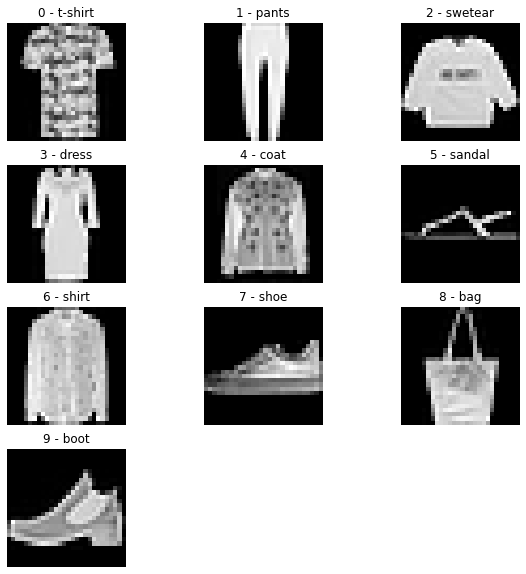

In [36]:
plt.figure(figsize=(10,10))
plt.plot([4, 3, 11])
for lab in labels:
    ax = plt.subplot(4, 3, lab+1)
    ax.set_title(str(lab) + " - " + labels_list[lab])
    plt.axis('off')
    plot_image_pd(index_to_pixels(train_set, train_set[train_set.label == lab].index[0]))

##### See if the data is balanced (distribution)

In [37]:
df_count = train_copy.groupby(['label','category'])['pixel1'].count()
df_count

label  category
0      t-shirt     6000
1      pants       6000
2      swetear     6000
3      dress       6000
4      coat        6000
5      sandal      6000
6      shirt       6000
7      shoe        6000
8      bag         6000
9      boot        6000
Name: pixel1, dtype: int64

The data is balanced, it means each label has the same data points that represent it.

Lets look on it with catplot:

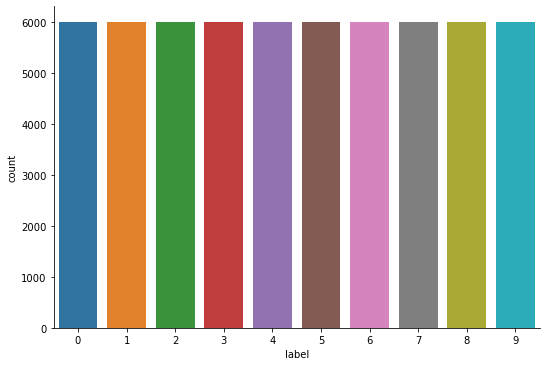

In [38]:
sns.catplot(data=train_copy,kind='count',height=5,aspect=1.5,x='label')

### Standardation

Learning process with large numbers is slower, so I will normalize the pixels values to be between 0 and 1 to get better prforamnce.

In [39]:
def normalize(set):
    set = set / 255.0
    return np.array(set)

train_without_label = normalize(train_without_label)
train_without_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Now the learning process should be done faster.

### Feature engineering:

In [40]:
train_set.info()
# No need to encode any feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [41]:
train_set.isnull().sum()
#No null values, no action required

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

### Dimensionality reduction using PCA:

In [42]:
labels_s = train_copy['label']
labels_DF = labels_s.to_frame(name='label')

In [43]:
pca = PCA(n_components=2)
train_set_pca = pca.fit_transform(train_without_label)
pca_df = pd.DataFrame(train_set_pca, columns=('first','second'))

In [44]:
df = pd.concat([labels_DF,pca_df],axis=1)
df

,label,first,second
0,2,3.686333,4.960529
1,2,-4.376434,3.861059
2,2,7.265152,1.568757
3,2,3.227788,-2.325256
4,2,4.146373,-4.039080
...,...,...,...
59995,1,0.017613,5.188697
59996,1,-3.115212,-5.211554
59997,1,2.181650,0.451775
59998,1,1.470069,6.063398


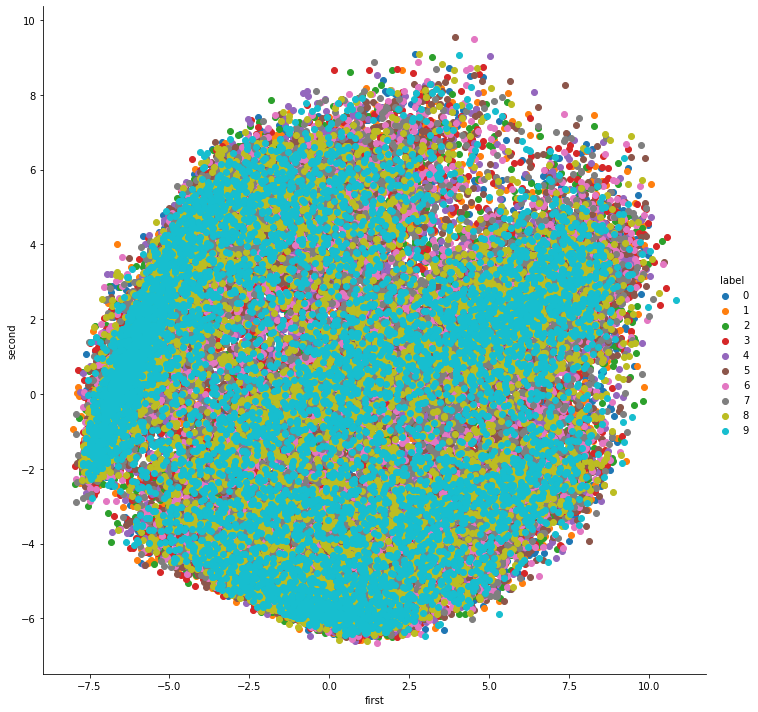

In [19]:
sns.FacetGrid(df,hue="label",height=10).map(plt.scatter,"first","second").add_legend()

In [45]:
#reminder: n_components = 2
pca.explained_variance_ratio_

array([0.29011353, 0.17727668])

In [46]:
print("n_components = 3: [0.29011353, 0.17727668, 0.060227]" )
print("n_components = 4: [0.29011353, 0.17727668, 0.060227  , 0.04970272]|")

n_components = 3: [0.29011353, 0.17727668, 0.060227]
n_components = 4: [0.29011353, 0.17727668, 0.060227  , 0.04970272]|


Ideal number of components is 2.

After standaraize our data and reduced dimentionality with PCA we are ready to train some models.

### Train test split:

In [47]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(train_without_label, target_set, test_size=0.3, random_state=42)
#x_train, x_test, y_train, y_test = train_test_split(train_without_label2, target_set, test_size=0.3, random_state=42)

#### Logistic regression: 

In [23]:
log_reg = LogisticRegression(random_state=42, max_iter=500, n_jobs=4)
log_reg.fit(x_train_pca,y_train_pca)
log_pred = log_reg.predict(x_test_pca)

In [24]:
score_log = metrics.accuracy_score(y_true=y_test_pca,y_pred=log_pred)
print("score of logistic regression: ",score_log)

score of logistic regression:  0.8516111111111111


In [ ]:
crovall_score_log = cross_val_score(log_reg, x_train_pca,y_train_pca,cv=5)
print(crovall_score_log.mean())

#### RandomForestCllassifier:

first I'm going to find the best parameters for RandomForest classifier

In [ ]:
params = {"n_estimators":range(1,20,2),"criterion":['gini','entropy']}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params,cv=5 )
grid_search.fit(x_train_pca,y_train_pca.ravel())
print(grid_search.best_estimator_)

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=19, criterion='entropy')
rnd_clf.fit(x_train_pca,y_train_pca)
rnd_pred = rnd_clf.predict(x_test_pca)

In [ ]:
score_rnd = metrics.accuracy_score(y_true=y_test_pca, y_pred =rnd_pred)
print("score rnd: ", score_rnd)

#### AdaBoost classifier

First, find the best prarmeters for DecisonTree: 

In [48]:
params2 = {"criterion":['gini','entropy'],'splitter':['best', 'random'],'min_samples_split':range(2,20,2)}

grid_search2 = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params2,cv=5 )
grid_search2.fit(x_train_pca,y_train_pca.ravel())
print(grid_search2.best_estimator_)

DecisionTreeClassifier(criterion='entropy', min_samples_split=12)


In [49]:
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',min_samples_split=12))
ada_clf.fit(x_train_pca,y_train_pca)
ada_pred = ada_clf.predict(x_test_pca)

In [50]:
score_ada = metrics.accuracy_score(y_true=y_test_pca, y_pred =ada_pred)
print("score rnd: ", score_ada)

score rnd:  0.8703888888888889


In [56]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(x_train_pca,y_train_pca)
xgb_pred = xgb_clf.predict(x_test_pca)

[09:44:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [57]:
score_xgb = metrics.accuracy_score(y_true=y_test_pca, y_pred =xgb_pred)
print("score rnd: ", score_xgb)

score rnd:  0.8988333333333334
